# pyPOCQuant with Jupyter
---

Demo notebook to show the usage of **pyPOCQuant** using a Jupyter/IPython notebook. 

This is a convinient way to automate the execution of multiple folders and directly analize and plot the results.

In [4]:
# Load the relevant dependencies
import os
import sys
import pandas as pd
sys.path.append('..\..')
from pypocquant.lib.pipeline import run_pipeline
from pypocquant.lib.settings import load_settings
# from pypocquant.lib.utils import set_tesseract_exe
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

Next lets load and print the example config

In [8]:
p = Path(os.path.abspath('images'))
settings_file_path = Path(p.parent / 'config.conf')
print('The pipeline will be run with the following configuration')
f = open(str(settings_file_path), "r")
print(f.read()) 

The pipeline will be run with the following configuration
max_workers=4
qc=True
verbose=True
control_band_index=-1
sensor_band_names=('igm', 'igg', 'ctl')
peak_expected_relative_location=(0.31, 0.53, 0.75)
sensor_center=(147, 522)
sensor_size=(45, 215)
sensor_border=(7, 7)
perform_sensor_search=True
qr_code_border=40
subtract_background=True
sensor_search_area=(55, 225)
sensor_thresh_factor=2.0
raw_auto_stretch=False
raw_auto_wb=False
strip_try_correct_orientation=False
strip_try_correct_orientation_rects=(0.52, 0.15, 0.09)
strip_text_to_search=''
strip_text_on_right=False
force_fid_search=False



In [9]:
if settings_file_path.exists():
    input_folder_path = Path(p)
    results_folder_path = Path(input_folder_path / 'pipeline')
    results_folder_path.mkdir(parents=True, exist_ok=True)
    print(f'RUN pipeline for {p}')
    
    ## Load the settings
    settings = load_settings(settings_file_path)

    ## Run the pipeline
    run_pipeline(
        input_folder_path,
        results_folder_path,
        **settings
    )

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

RUN pipeline for C:\Users\Localadmin\Documents\pypocquantui\src\main\python\pyPOCQuantUI\pypocquant\examples\images


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:10<00:00,  1.52s/it]

Results written to C:\Users\Localadmin\Documents\pypocquantui\src\main\python\pyPOCQuantUI\pypocquant\examples\images\pipeline\quantification_data.csv
Logfile written to C:\Users\Localadmin\Documents\pypocquantui\src\main\python\pyPOCQuantUI\pypocquant\examples\images\pipeline\log.txt
Settings written to C:\Users\Localadmin\Documents\pypocquantui\src\main\python\pyPOCQuantUI\pypocquant\examples\images\pipeline\settings.conf
Pipeline completed.


### Read and plot the results

In [10]:
results = pd.read_csv(str(Path(p / 'pipeline/quantification_data.csv')))
results

,fid,fid_num,filename,extension,basename,iso_date,iso_time,exp_time,f_number,focal_length_35_mm,...,igm,igm_abs,igm_ratio,igg,igg_abs,igg_ratio,ctl,ctl_abs,ctl_ratio,user
0,H01601828610122,1601828610122,IMG_9067.JPG,.JPG,IMG_9067,2020-06-21,12-14-03,[1/10],[63/10],-1,...,0,0.000000,0.000000,0,0.000000,0.000000,1,1087.000925,1.0,CUNYA
1,F5921394,5921394,IMG_9068.JPG,.JPG,IMG_9068,2020-06-21,12-14-46,[1/10],[63/10],-1,...,1,822.735949,0.805935,1,1443.824091,1.414340,1,1020.846550,1.0,CUNYA
2,F5922180,5922180,IMG_9069.JPG,.JPG,IMG_9069,2020-06-21,12-15-07,[1/10],[63/10],-1,...,1,200.968865,0.194804,1,1029.903783,0.998311,1,1031.645989,1.0,CUNYA
3,F5922944,5922944,IMG_9070.JPG,.JPG,IMG_9070,2020-06-21,12-15-28,[1/10],[63/10],-1,...,0,0.000000,0.000000,1,405.080753,0.403488,1,1003.946928,1.0,CUNYA


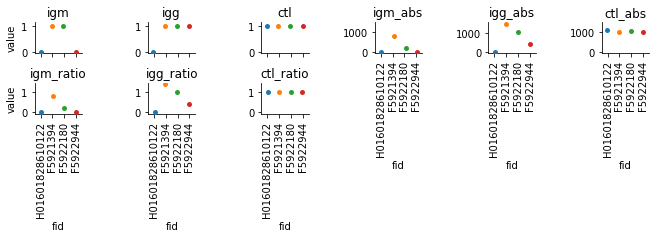

In [11]:
%matplotlib inline
dm = pd.melt(results, id_vars=['fid'], value_vars=['igm', 'igg', 'ctl', 'igm_abs', 'igg_abs', 'ctl_abs', 'igm_ratio', 'igg_ratio', 'ctl_ratio'])
g = sns.catplot(x="fid", y="value", hue="fid", col='variable', col_wrap=6, data=dm, sharey=False, height=1, aspect=1.6) 
g.set_xticklabels(rotation=90)

axes = g.axes.flatten()
titles = ['igm', 'igg', 'ctl', 'igm_abs', 'igg_abs', 'ctl_abs', 'igm_ratio', 'igg_ratio', 'ctl_ratio']
limits = [[-0.05,1.15], [-0.05,1.15], [-0.05,1.15], [-80,1500], [-80,1550], [-80,1500], 
          [-0.08,1.5], [-0.08,1.5], [-0.08,1.5]]
for ix, ax in enumerate(axes):
    ax.set_title(titles[ix])
    ax.set_ylim(limits[ix])
g.savefig("output.pdf", dpi=300)

### Check the qc images

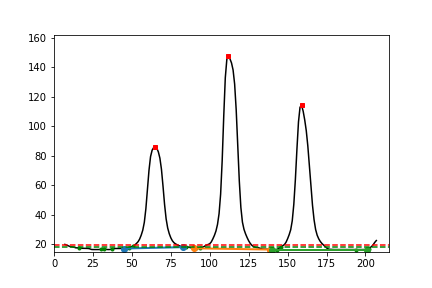

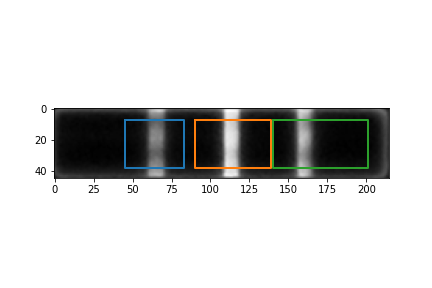

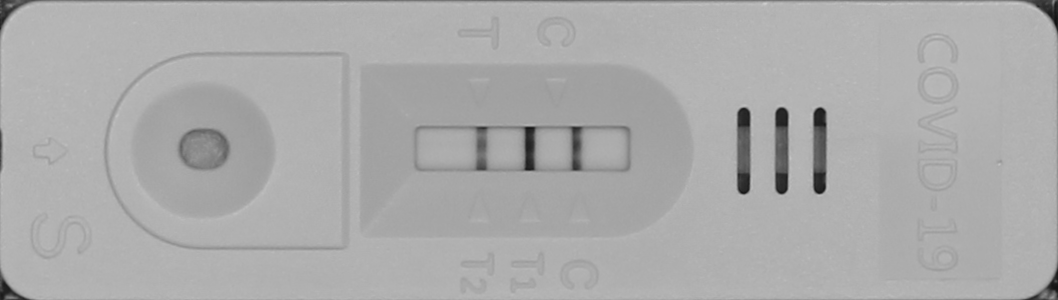

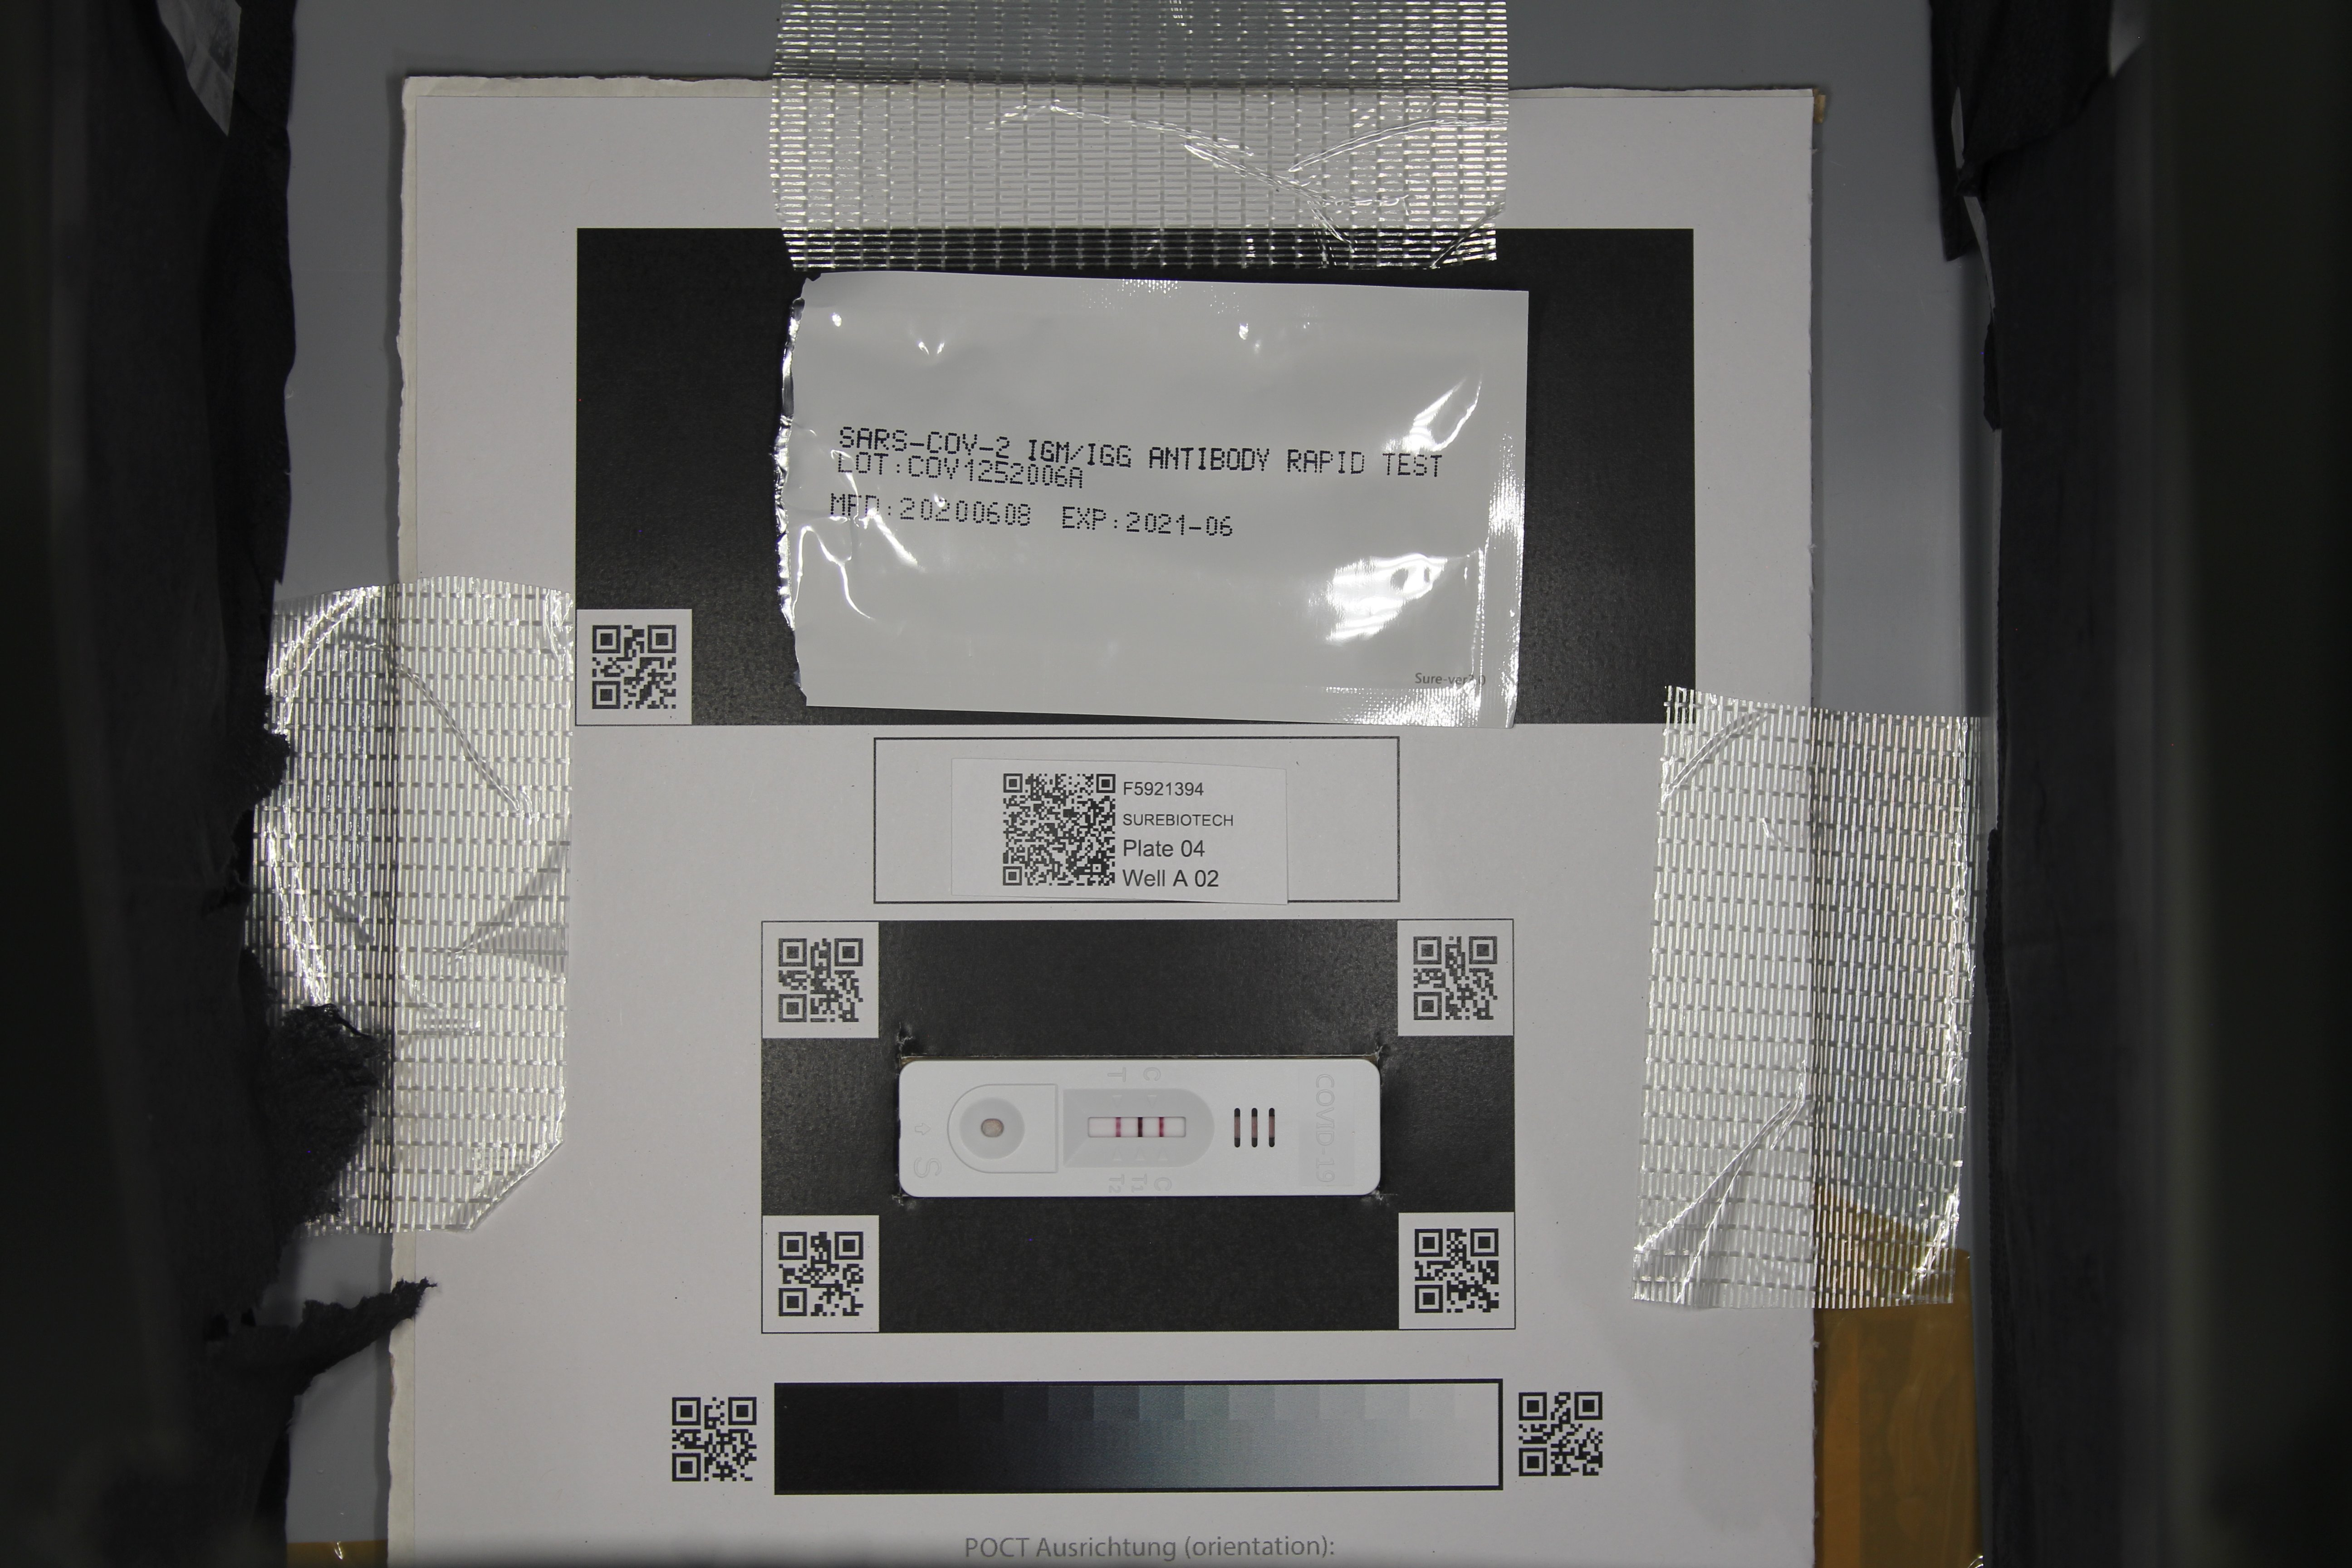

In [12]:
i1 = Image(filename=str(Path(p / 'pipeline/IMG_9068_JPG_peak_analysis.PNG'))) 
i2 = Image(filename=str(Path(p / 'pipeline/IMG_9068_JPG_peak_overlays.PNG'))) 
i3 = Image(filename=str(Path(p / 'pipeline/IMG_9068_JPG_strip_gray_aligned.PNG'))) 
i4 = Image(filename=str(Path(p / 'pipeline/IMG_9068_JPG_rotated.JPG'))) 
display(i1, i2, i3, i4)

### Inspect the log file

In [14]:
f = open(str(Path(p / 'pipeline/log.txt')), "r")
print(f.read()) 
f.close()

 
File = 20210105_config_run_1.conf
 
File = IMG_9067.JPG
Processing IMG_9067.JPG
Best percentiles for barcode extraction: (0, 100); best scaling factor = 0.25; score = 6/6
Detected FIDs for rotated image: H01601828610122 H01601828610122  
File IMG_9067.JPG: best percentiles for barcode extraction after rotation: (0, 100); best scaling factor = 0.5; score = 6/6
File IMG_9067.JPG: Strip box image rotated by angle -0.285863954857813 degrees using QR code locations.
File IMG_9067.JPG: FID = 'H01601828610122'
File IMG_9067.JPG: sensor coordinates = [126, 171, 423, 638], score = 1.0
Peak 143 has lower bound 99 (d = 44) with relative intensity 0.00 and upper bound 166 (d = 23) with relative intensity 0.00. Band width is 68. Band skewness is 0.52
File IMG_9067.JPG: the bands were 'normal'.
âœ“ File IMG_9067.JPG: successfully processed and added to results table.
 
File = IMG_9068.JPG
Processing IMG_9068.JPG
Best percentiles for barcode extraction: (0, 100); best scaling factor = 0.25; score =

c:\users\localadmin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\Localadmin\\Documents\\pypocquantui\\src\\main\\python\\pyPOCQuantUI\\pypocquant\\examples\\images\\pipeline\\log.txt' mode='r' encoding='cp1252'>
  """Entry point for launching an IPython kernel.
